In [1]:
import numpy as np

class Perceptron_w_constant():

    '''
    A class to perform predication and fit a perceptron to binary data
    
    Attributes
    ------------
    labeled_data_w_constant : list
        list of lists containing samples with inputs and single class label [-1 or 1]
    number_iterations : int
        number of iterations of the update during fit()
    learning_rate : float
        multiplicative learning rate used during update in fit()
    

    '''
    # labeled_data_w_constant = [x_0,x_1, x_2, x_3, y]  (many rows of this)   
    # weights = [w_0, w_1, w_2, w_3]
    def __init__ (self, labeled_data_w_constant, number_iterations, learning_rate):        
        self.data_w_constant = np.array(labeled_data_w_constant)
        self.weights = np.full((self.data_w_constant.shape[1]-1), 1.0) # note that this is just an easy way to get "number of features + 1" and set them to 1.0
        self.niters = number_iterations
        self.learnr = learning_rate
    
    def predict(self, feature_set_w_constant):
        
        weighted_vector = feature_set_w_constant*self.weights
        z = np.sum(weighted_vector)
        #    or
        # z = np.dot(feature_set_w_constant, self.weights)

        
        return (1 if z > 0 else -1)
    
    def fit(self):
        # Loop over multiple iterations
        for _ in range(self.niters):
            
            # Loop through all data
            for row in self.data_w_constant:
                
                features_now = row[:-1]  # [x_0, x_1, ..., x_n] = [1, x_1, ..., x_n]
                class_label_now = row[-1] #[y] either 1 or -1
                
                update = self.learnr * (class_label_now - self.predict(features_now))
                self.weights += update * features_now  # 3 x1 (3 numbers)

    def errors(self):
        error_count = 0
        for row in self.data_w_constant:
            # print("data: ", row[:-1], "actual: ", row[-1], "predict: ", self.predict(row[:-1]), "weights: ", self.weights)
            if (self.predict(row[:-1]) != row[-1]):
                error_count += 1
        print("Error count: ", error_count)
        print("Weights: ", self.weights[1:])
        print("Bias weight:", self.weights[0])

In [2]:
f = open("Stanley Cup Data - project_dataset.csv")
header = next(f) # dump the header line
presidents_cup = []
stanley_cup = []
for line in f:
    fields = line.split(",")
    # need to strip label because, as the last element, it has a \n
    presidents = (1.0 if fields[-1] == "1\n" else -1.0)
    stanley = (1.0 if fields[-2] == "1" else -1.0)
    # the fields are strings until we conver them
    presidents_cup.append([1, float(fields[8]), float(fields[4]), presidents])
    stanley_cup.append([1, float(fields[8]), float(fields[4]), stanley])
f.close()

In [3]:
print(len(presidents_cup))

723


In [4]:
presidents_2022 = presidents_cup[0:31]
presidents_2021 = presidents_cup[31:63]
presidents_2020 = presidents_cup[63:94] #Avalanche won here because of regulation wins
presidents_2019 = presidents_cup[94:126]
presidents_2018 = presidents_cup[126:158]
presidents_2017 = presidents_cup[158:189]
presidents_2016 = presidents_cup[189:220]
presidents_2015 = presidents_cup[220:252]
presidents_2014 = presidents_cup[252:281]
presidents_2013 = presidents_cup[281:312]
presidents_2012 = presidents_cup[312:343]
presidents_2011 = presidents_cup[343:372]
presidents_2010 = presidents_cup[372:402]
presidents_2009 = presidents_cup[402:432]
presidents_2008 = presidents_cup[432:461]
presidents_2007 = presidents_cup[461:490]
presidents_2006 = presidents_cup[490:520]
presidents_2005 = presidents_cup[520:550]
presidents_2003 = presidents_cup[550:579]
presidents_2002 = presidents_cup[579:609]
presidents_2001 = presidents_cup[609:640]
presidents_2000 = presidents_cup[640:669]
presidents_1999 = presidents_cup[669:697]
presidents_1998 = presidents_cup[697:723]

In [7]:
stanley_2022 = stanley_cup[0:31]
stanley_2021 = stanley_cup[31:63]
stanley_2020 = stanley_cup[63:94]
stanley_2019 = stanley_cup[94:126]
stanley_2018 = stanley_cup[126:158]
stanley_2017 = stanley_cup[158:189]
stanley_2016 = stanley_cup[189:220]
stanley_2015 = stanley_cup[220:252]
stanley_2014 = stanley_cup[252:281]
stanley_2013 = stanley_cup[281:312]
stanley_2012 = stanley_cup[312:343]
stanley_2011 = stanley_cup[343:372]
stanley_2010 = stanley_cup[372:402]
stanley_2009 = stanley_cup[402:432]
stanley_2008 = stanley_cup[432:461]
stanley_2007 = stanley_cup[461:490]
stanley_2006 = stanley_cup[490:520]
stanley_2005 = stanley_cup[520:550]
stanley_2003 = stanley_cup[550:579]
stanley_2002 = stanley_cup[579:609]
stanley_2001 = stanley_cup[609:640]
stanley_2000 = stanley_cup[640:669]
stanley_1999 = stanley_cup[669:697]
stanley_1998 = stanley_cup[697:723]

In [8]:
p = Perceptron_w_constant(presidents_cup, 100, 0.05)
p.fit()
p.errors()

Error count:  89
Weights:  [-84.2 181.6]
Bias weight: -62.200000000000614


In [9]:
s = Perceptron_w_constant(stanley_cup, 100, 0.05)
s.fit()
s.errors()

Error count:  24
Weights:  [-37.   66.5]
Bias weight: -36.300000000000246


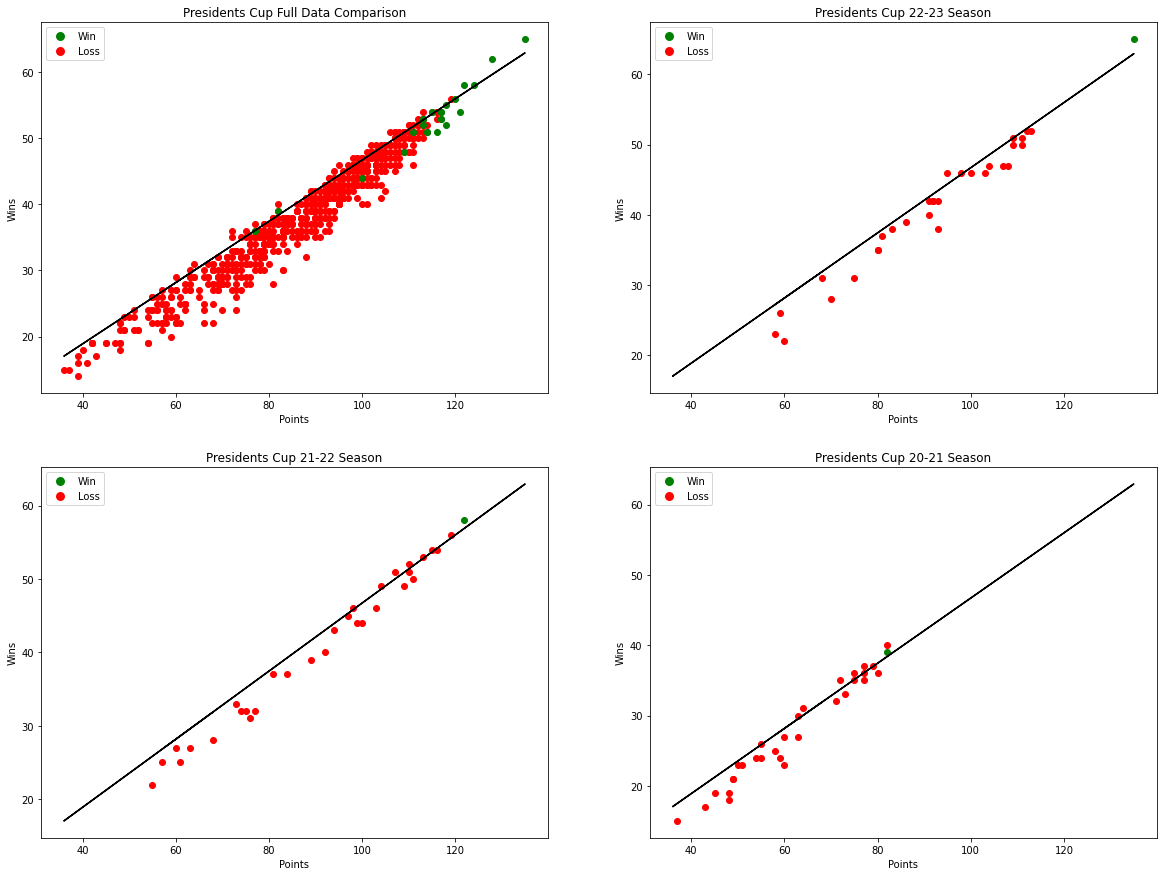

In [10]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

plt.figure(figsize = (20,15))

plt.subplot(221)
presidents_win = [ [x,y] for const,x,y,label in presidents_cup if label==1]
presidents_loss = [ [x,y] for const,x,y,label in presidents_cup if label==-1]
for x,y in presidents_loss:
    plt.scatter(x,y,c="red")
for x,y in presidents_win:
    plt.scatter(x,y,c="green")
x_list = [row[1] for row in presidents_cup]
slope = -1 * (p.weights[1] / p.weights[2])
intercept = -1 * (p.weights[0] / p.weights[2])
y_list = [slope * x + intercept for x in x_list]
plt.plot(x_list, y_list, c = "black")
plt.xlabel("Points")
plt.ylabel("Wins")
plt.title("Presidents Cup Full Data Comparison")
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Win', markerfacecolor='g', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Loss', markerfacecolor='r', markersize=10),]
plt.legend(handles=legend_elements)

plt.subplot(222)
presidents_win = [ [x,y] for const,x,y,label in presidents_2022 if label==1]
presidents_loss = [ [x,y] for const,x,y,label in presidents_2022 if label==-1]
for x,y in presidents_loss:
    plt.scatter(x,y,c="red")
for x,y in presidents_win:
    plt.scatter(x,y,c="green")
plt.plot(x_list, y_list, c = "black")
plt.xlabel("Points")
plt.ylabel("Wins")
plt.title("Presidents Cup 22-23 Season")
plt.legend(handles=legend_elements)

plt.subplot(223)
presidents_win = [ [x,y] for const,x,y,label in presidents_2021 if label==1]
presidents_loss = [ [x,y] for const,x,y,label in presidents_2021 if label==-1]
for x,y in presidents_loss:
    plt.scatter(x,y,c="red")
for x,y in presidents_win:
    plt.scatter(x,y,c="green")
plt.plot(x_list, y_list, c = "black")
plt.xlabel("Points")
plt.ylabel("Wins")
plt.title("Presidents Cup 21-22 Season")
plt.legend(handles=legend_elements)

plt.subplot(224)
presidents_win = [ [x,y] for const,x,y,label in presidents_2020 if label==1]
presidents_loss = [ [x,y] for const,x,y,label in presidents_2020 if label==-1]
for x,y in presidents_loss:
    plt.scatter(x,y,c="red")
for x,y in presidents_win:
    plt.scatter(x,y,c="green")
plt.plot(x_list, y_list, c = "black")
plt.xlabel("Points")
plt.ylabel("Wins")
plt.title("Presidents Cup 20-21 Season")
plt.legend(handles=legend_elements)

<Figure size 1440x1080 with 0 Axes>

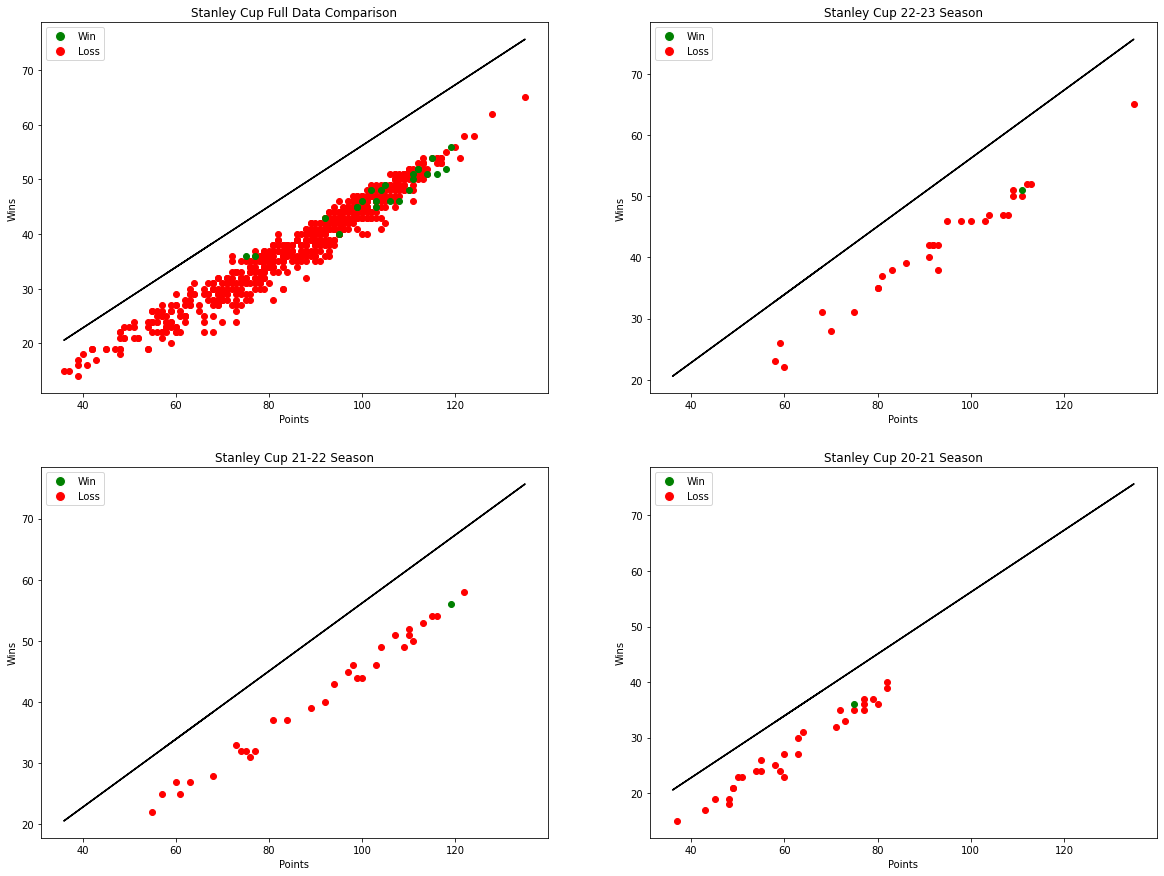

In [11]:
plt.figure(figsize = (20,15))

plt.figure(figsize = (20,15))

plt.subplot(221)
stanley_win = [ [x,y] for const,x,y,label in stanley_cup if label==1]
stanley_loss = [ [x,y] for const,x,y,label in stanley_cup if label==-1]
for x,y in stanley_loss:
    plt.scatter(x,y,c="red")
for x,y in stanley_win:
    plt.scatter(x,y,c="green")
x_list = [row[1] for row in stanley_cup]
slope = -1 * (s.weights[1] / s.weights[2])
intercept = -1 * (s.weights[0] / s.weights[2])
y_list = [slope * x + intercept for x in x_list]
plt.plot(x_list, y_list, c = "black")
plt.xlabel("Points")
plt.ylabel("Wins")
plt.title("Stanley Cup Full Data Comparison")
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Win', markerfacecolor='g', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Loss', markerfacecolor='r', markersize=10),]
plt.legend(handles=legend_elements)

plt.subplot(222)
stanley_win = [ [x,y] for const,x,y,label in stanley_2022 if label==1]
stanley_loss = [ [x,y] for const,x,y,label in stanley_2022 if label==-1]
for x,y in stanley_loss:
    plt.scatter(x,y,c="red")
for x,y in stanley_win:
    plt.scatter(x,y,c="green")
plt.plot(x_list, y_list, c = "black")
plt.xlabel("Points")
plt.ylabel("Wins")
plt.title("Stanley Cup 22-23 Season")
plt.legend(handles=legend_elements)

plt.subplot(223)
stanley_win = [ [x,y] for const,x,y,label in stanley_2021 if label==1]
stanley_loss = [ [x,y] for const,x,y,label in stanley_2021 if label==-1]
for x,y in stanley_loss:
    plt.scatter(x,y,c="red")
for x,y in stanley_win:
    plt.scatter(x,y,c="green")
plt.plot(x_list, y_list, c = "black")
plt.xlabel("Points")
plt.ylabel("Wins")
plt.title("Stanley Cup 21-22 Season")
plt.legend(handles=legend_elements)

plt.subplot(224)
stanley_win = [ [x,y] for const,x,y,label in stanley_2020 if label==1]
stanley_loss = [ [x,y] for const,x,y,label in stanley_2020 if label==-1]
for x,y in stanley_loss:
    plt.scatter(x,y,c="red")
for x,y in stanley_win:
    plt.scatter(x,y,c="green")
plt.plot(x_list, y_list, c = "black")
plt.xlabel("Points")
plt.ylabel("Wins")
plt.title("Stanley Cup 20-21 Season")
plt.legend(handles=legend_elements)